# Import Packages

In [2]:
import warnings 
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, PorterStemmer
import math
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc, mean_squared_error
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
import gensim
import string
import tensorflow as tf
import keras
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import CuDNNLSTM
from keras.layers import Dropout
from keras.layers.embeddings import Embedding
import warnings
from keras import backend as K

Using TensorFlow backend.


In [3]:
import keras.backend.tensorflow_backend as tfback

print("tf.__version__ is", tf.__version__)
print("tf.keras.__version__ is:", tf.keras.__version__)

def _get_available_gpus():
    """Get a list of available gpu devices (formatted as strings).

    # Returns
        A list of available GPU devices.
    """
    #global _LOCAL_DEVICES
    if tfback._LOCAL_DEVICES is None:
        devices = tf.config.list_logical_devices()
        tfback._LOCAL_DEVICES = [x.name for x in devices]
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]

tfback._get_available_gpus = _get_available_gpus

tf.__version__ is 2.1.0
tf.keras.__version__ is: 2.2.4-tf


# Import the datasets 

In [4]:
df_Aquaphor= pd.read_csv(r'D:\Springboard\Github\Data_NLP_Baby_Lotion\Processed Dataset\df_Aquaphor.csv')
df_Aveeno = pd.read_csv(r'D:\Springboard\Github\Data_NLP_Baby_Lotion\Processed Dataset\df_Aveeno.csv')
df_CeraVe = pd.read_csv(r'D:\Springboard\Github\Data_NLP_Baby_Lotion\Processed Dataset\df_CeraVe.csv')
df_Cetaphil = pd.read_csv(r'D:\Springboard\Github\Data_NLP_Baby_Lotion\Processed Dataset\df_Cetaphil.csv')
df_Era = pd.read_csv(r'D:\Springboard\Github\Data_NLP_Baby_Lotion\Processed Dataset\df_Era.csv')
df_Eucerin = pd.read_csv(r'D:\Springboard\Github\Data_NLP_Baby_Lotion\Processed Dataset\df_Eucerin.csv')
df_Mustela = pd.read_csv(r'D:\Springboard\Github\Data_NLP_Baby_Lotion\Processed Dataset\df_Mustela.csv')
df_Vanicream = pd.read_csv(r'D:\Springboard\Github\Data_NLP_Baby_Lotion\Processed Dataset\df_Vanicream.csv')

In [5]:
df_Aquaphor

review rating                                        review text  \
0                 1  might fake aquaphor people beware always purch...   
1                 4  edit continued use aquaphor amazon aside one w...   
2                 1  received strange container labeling white blue...   
3                 3  like others said aquaphor bought amazon differ...   
4                 4  close star product amazing reason giving star ...   
...             ...                                                ...   
4329              1      full chemical use wish could give zero rating   
4330              3                                               oily   
4331              1  bad ingredient especially mineral oil mineral ...   
4332              5  work great baby fragrance keep skin moist woul...   
4333              5  muy grande ya tiene un año todavia le queda po...   

         Brand  
0     Aquaphor  
1     Aquaphor  
2     Aquaphor  
3     Aquaphor  
4     Aquaphor  
...        ...  
4329  Aquaphor  
4330  Aquaphor  
4331  Aquaphor  
4332  Aquaphor  
4333  Aquaphor  

[4334 rows x 3 columns]

# Conducting Wordcloud for all datasets 

It is a visualization technique for text data wherein each word is picturized with its importance in the context or its frequency. This is a very handy application when it comes to understanding the crux of today's news or the content of any youtube channel.

In [6]:
from wordcloud import WordCloud, STOPWORDS

In [16]:
stpwrds = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stpwrds,
        max_words=80,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

## Aquaphor 

### Prevalent words in overall reviews of Aquaphor 

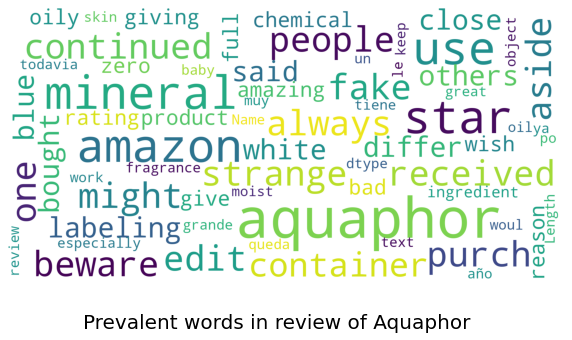

In [18]:
# 'amazon' and 'aquaphor' is not useful, how to remove the specific words 

show_wordcloud(df_Aquaphor['review text'], title = 'Prevalent words in Aquaphor Reviews')

### Explore more prevalent words within different rating 

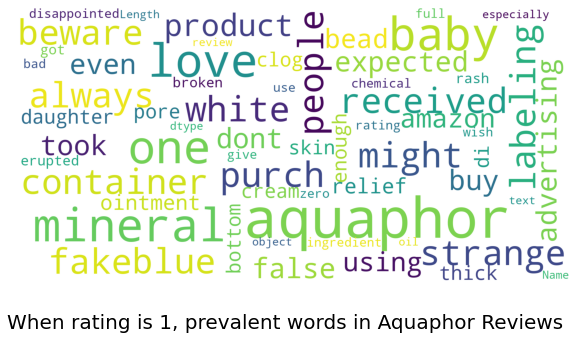

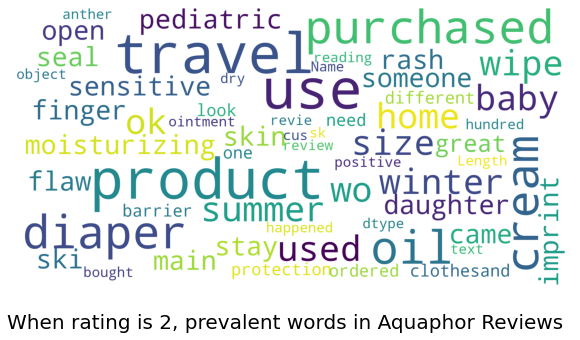

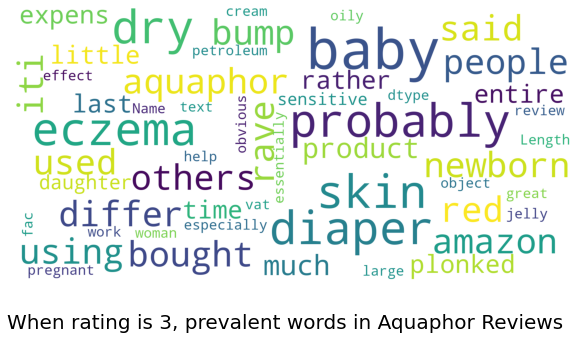

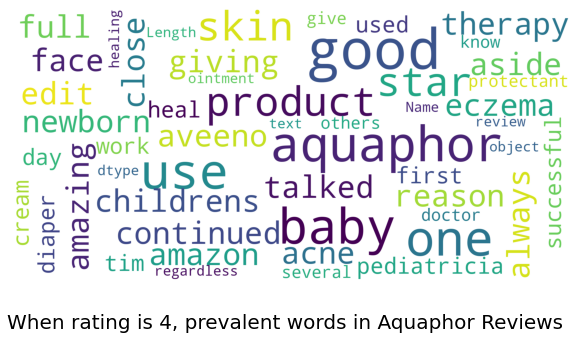

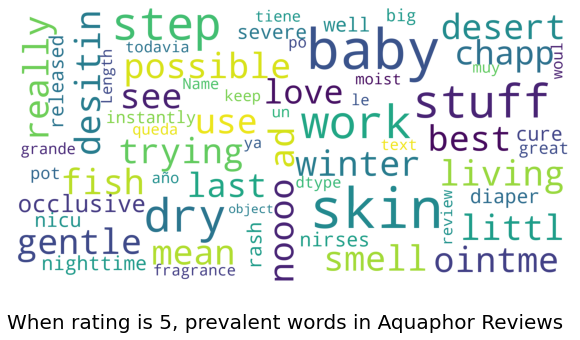

In [24]:
for i in range(1,6):
    show_wordcloud(df_Aquaphor[df_Aquaphor['review rating']== i]['review text'], title = 'When rating is {}, prevalent words in Aquaphor Reviews'.format(i))

## Aveeno

### Prevalent words in overall reviews of Aveeno 

In [27]:
df_Aveeno.shape

(2732, 3)

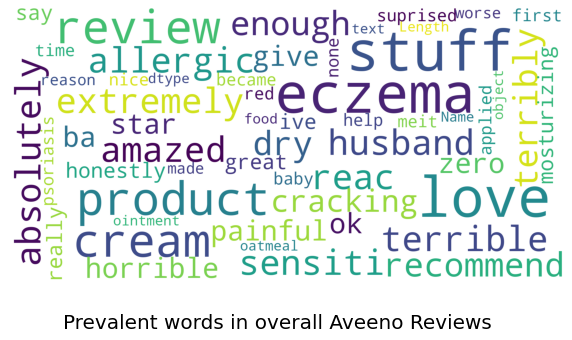

In [25]:
show_wordcloud(df_Aveeno['review text'], title = 'Prevalent words in overall Aveeno Reviews')

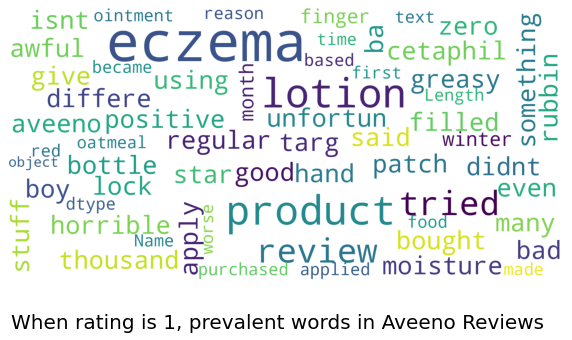

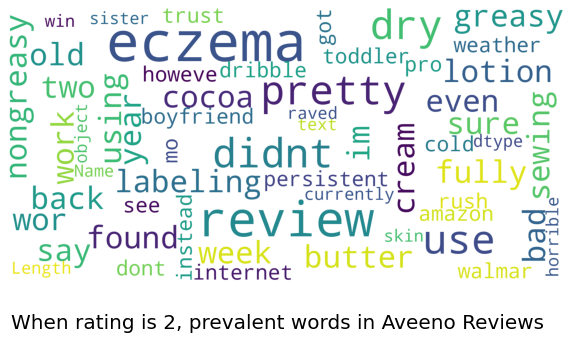

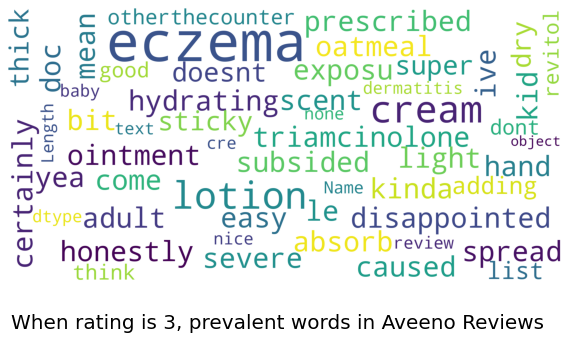

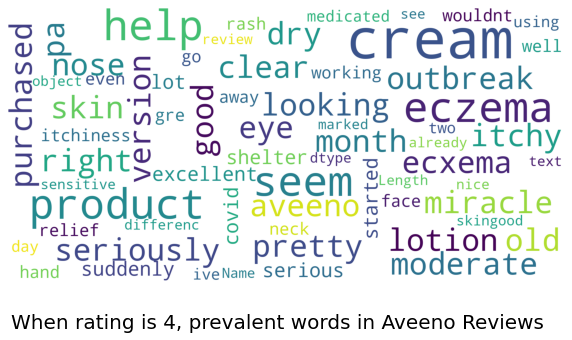

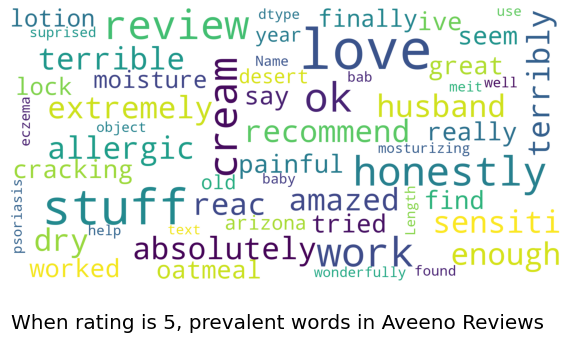

In [26]:
# Explore more prevalent words within different rating 
for i in range(1,6):
    show_wordcloud(df_Aveeno[df_Aveeno['review rating']== i]['review text'], title = 'When rating is {}, prevalent words in Aveeno Reviews'.format(i))

## CeraVe 

### Prevalent words in overall reviews of CeraVe

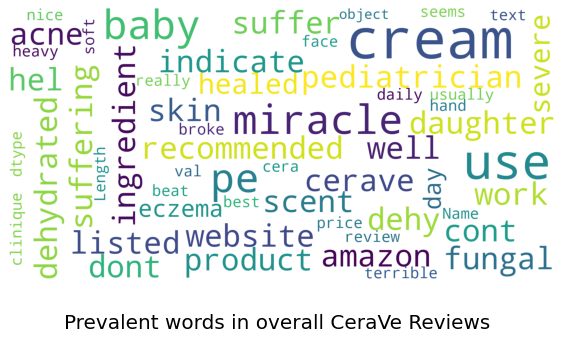

In [28]:
show_wordcloud(df_CeraVe['review text'], title = 'Prevalent words in overall CeraVe Reviews')

### Explore more prevalent words within different rating 

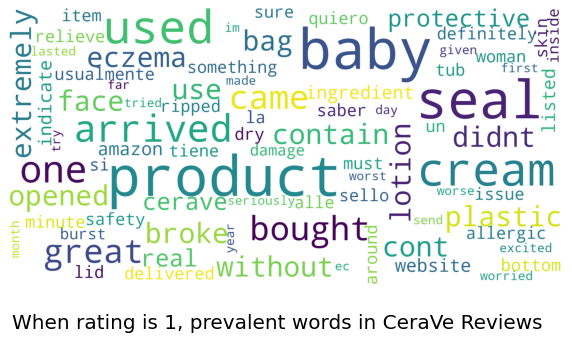

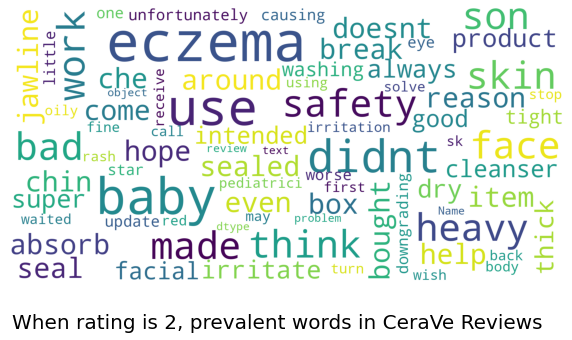

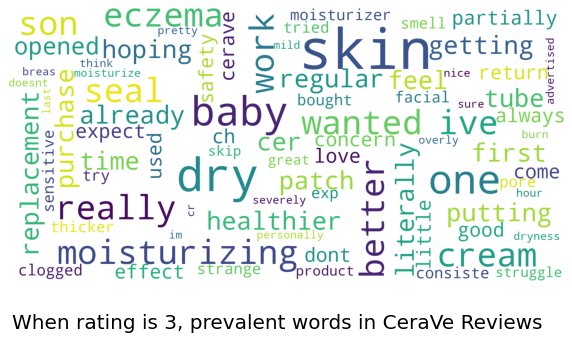

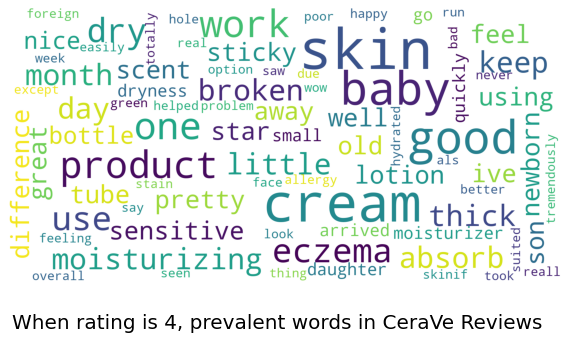

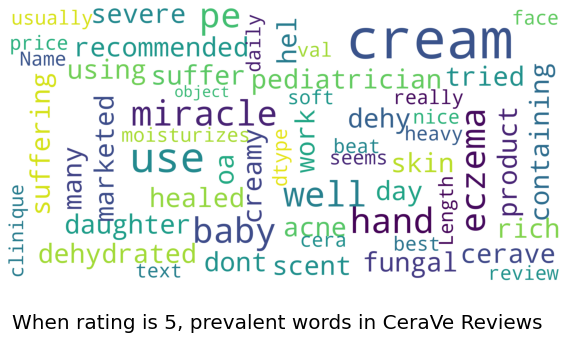

In [40]:
# Explore more prevalent words within different rating 
for i in range(1,6):
    show_wordcloud(df_CeraVe[df_CeraVe['review rating']== i]['review text'], title = 'When rating is {}, prevalent words in CeraVe Reviews'.format(i))

## Cetaphil

### Prevalent words in overall reviews of Cetaphil 

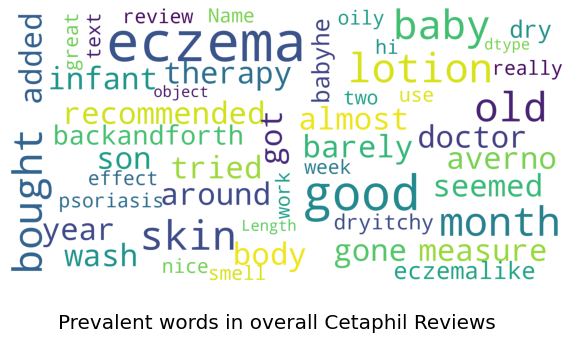

In [39]:
show_wordcloud(df_Cetaphil['review text'], title = 'Prevalent words in overall Cetaphil Reviews')

### Explore more prevalent words within different rating 

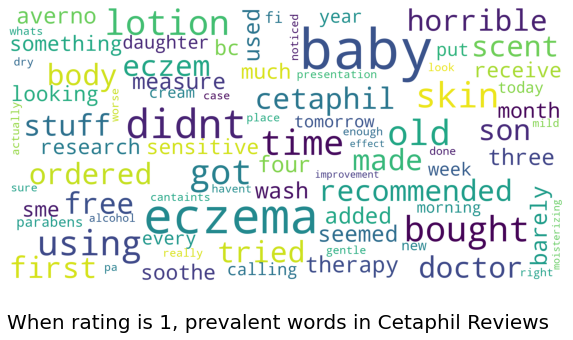

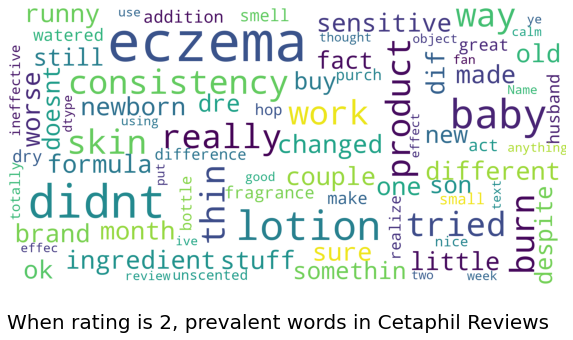

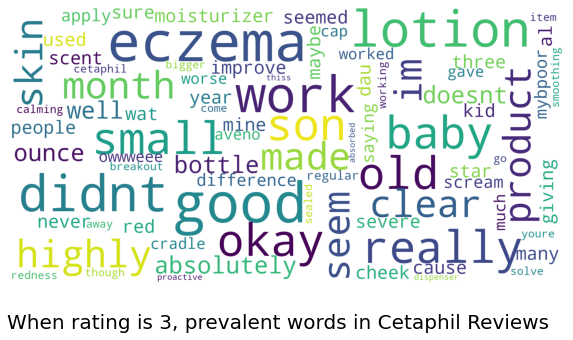

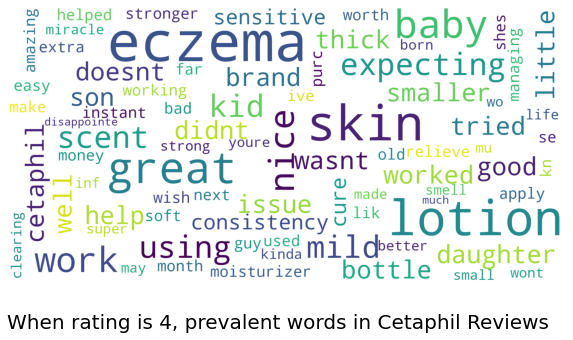

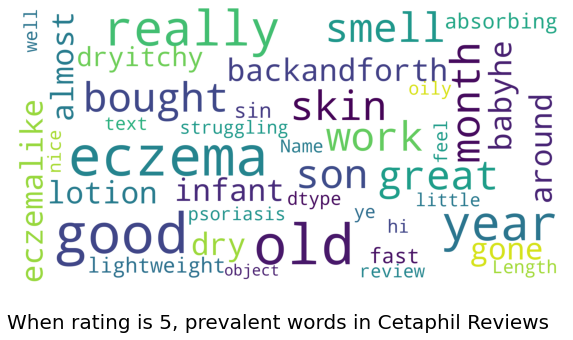

In [38]:
# Explore more prevalent words within different rating 
for i in range(1,6):
    show_wordcloud(df_Cetaphil[df_Cetaphil['review rating']== i]['review text'], title = 'When rating is {}, prevalent words in Cetaphil Reviews'.format(i))

## Era

### Prevalent words in overall reviews of Era 

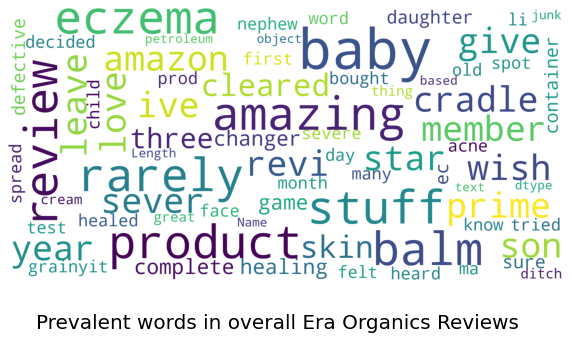

In [37]:
show_wordcloud(df_Era['review text'], title = 'Prevalent words in overall Era Organics Reviews')

### Explore more prevalent words within different rating 

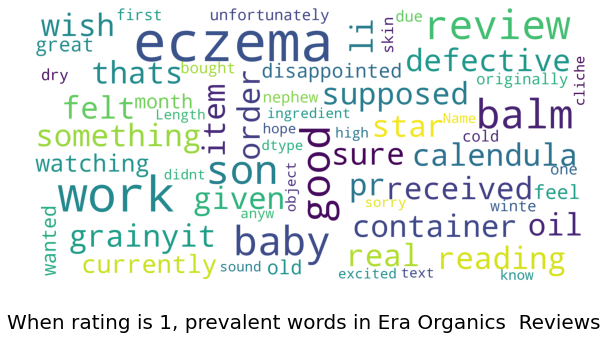

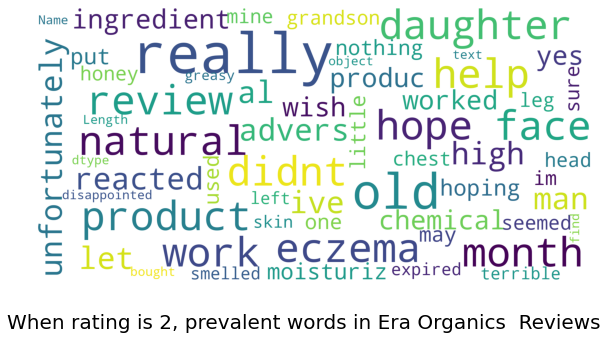

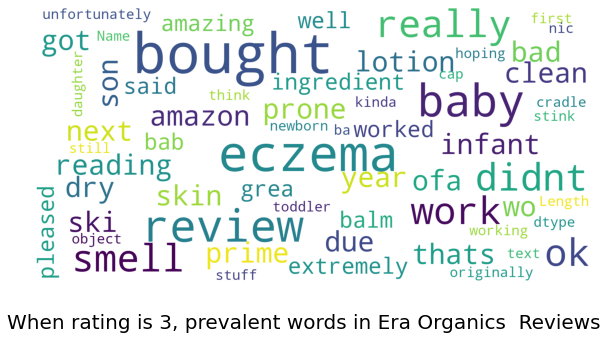

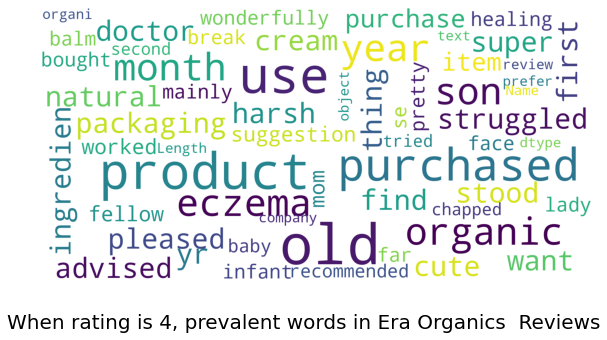

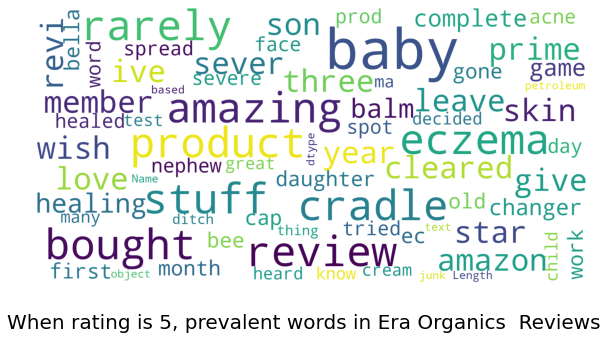

In [36]:
# Explore more prevalent words within different rating 
for i in range(1,6):
    show_wordcloud(df_Era[df_Era['review rating']== i]['review text'], title = 'When rating is {}, prevalent words in Era Organics  Reviews'.format(i))

In [ ]:
## Eucerin

In [ ]:
### Prevalent words in overall reviews of Eucerin 

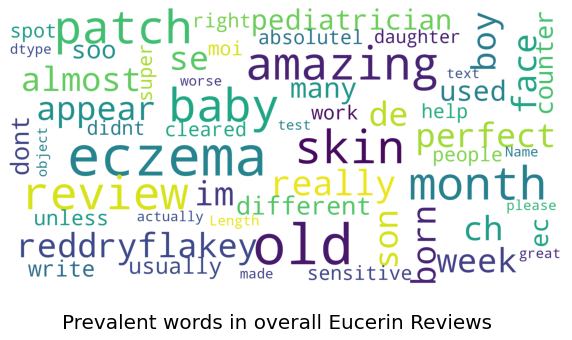

In [41]:
show_wordcloud(df_Eucerin['review text'], title = 'Prevalent words in overall Eucerin Reviews')

### Explore more prevalent words within different rating 

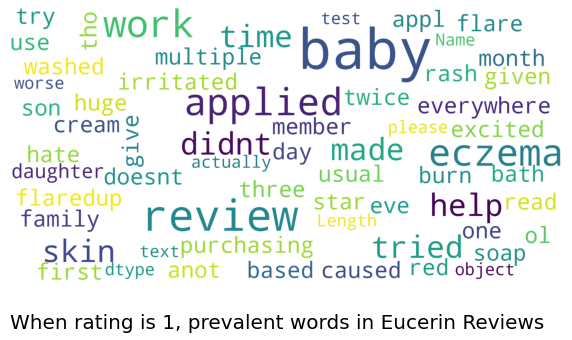

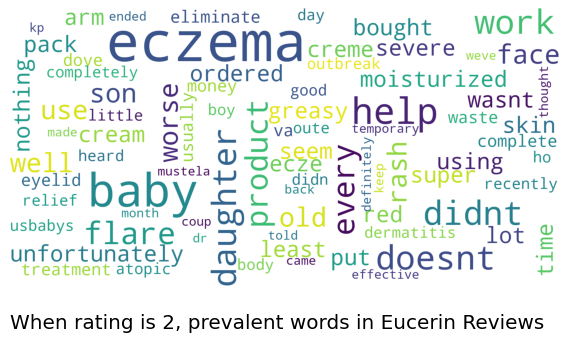

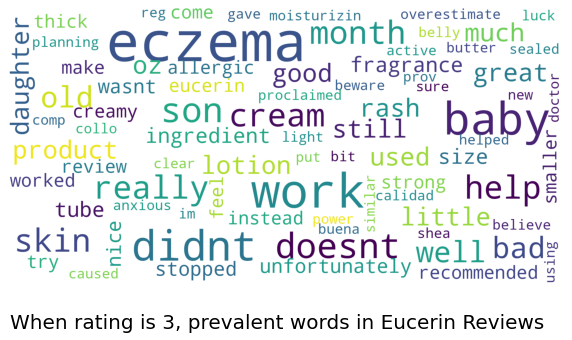

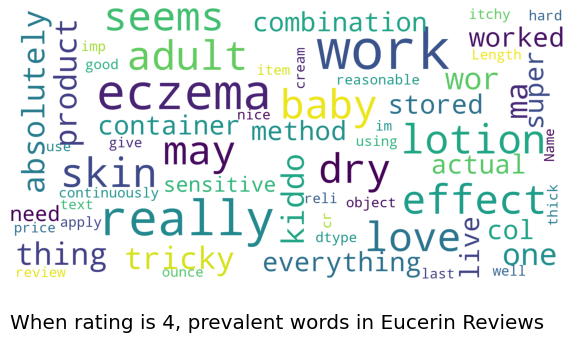

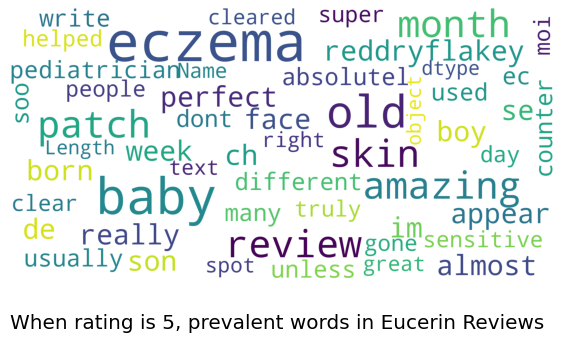

In [42]:
# Explore more prevalent words within different rating 
for i in range(1,6):
    show_wordcloud(df_Eucerin[df_Eucerin['review rating']== i]['review text'], title = 'When rating is {}, prevalent words in Eucerin Reviews'.format(i))

## Mustela

### Prevalent words in overall reviews of Mustela 

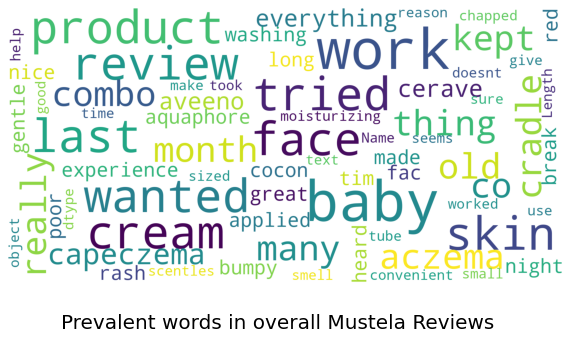

In [43]:
show_wordcloud(df_Mustela['review text'], title = 'Prevalent words in overall Mustela Reviews')

In [44]:
### Explore more prevalent words within different rating 

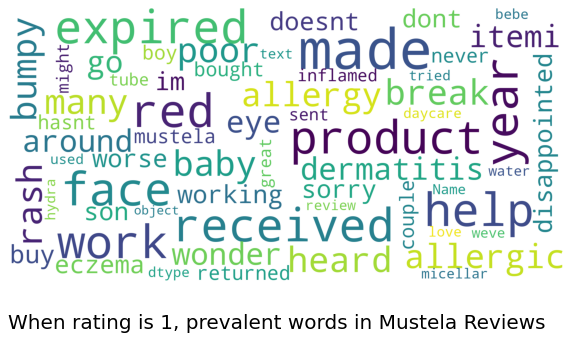

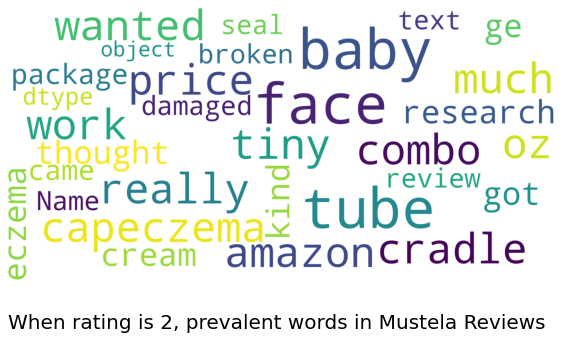

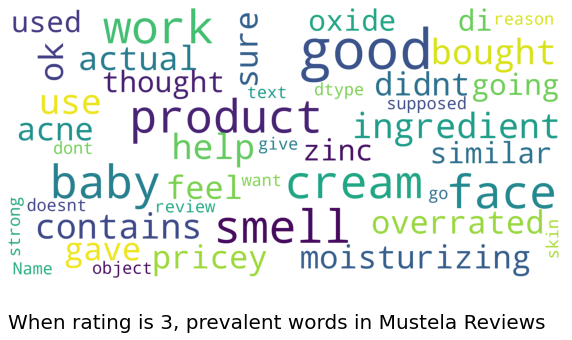

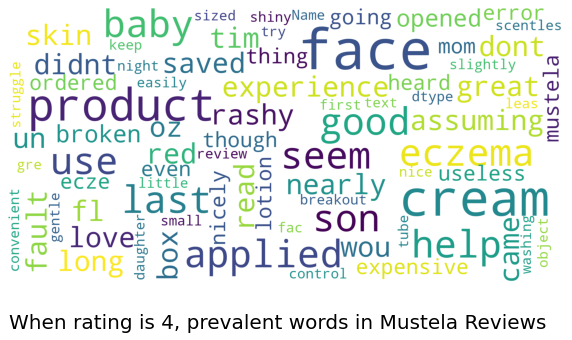

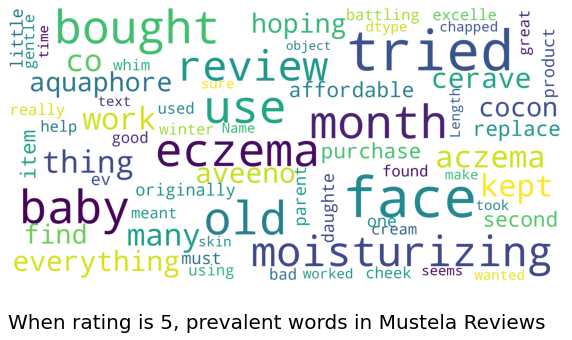

In [45]:
# Explore more prevalent words within different rating 
for i in range(1,6):
    show_wordcloud(df_Mustela[df_Mustela['review rating']== i]['review text'], title = 'When rating is {}, prevalent words in Mustela Reviews'.format(i))

## Vanicream

### Prevalent words in overall reviews of Vanicream 

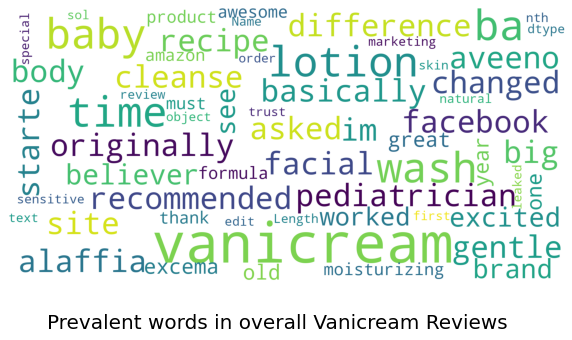

In [46]:
show_wordcloud(df_Vanicream['review text'], title = 'Prevalent words in overall Vanicream Reviews')

### Explore more prevalent words within different rating 

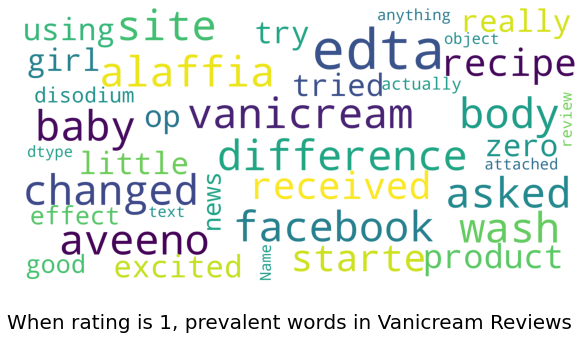

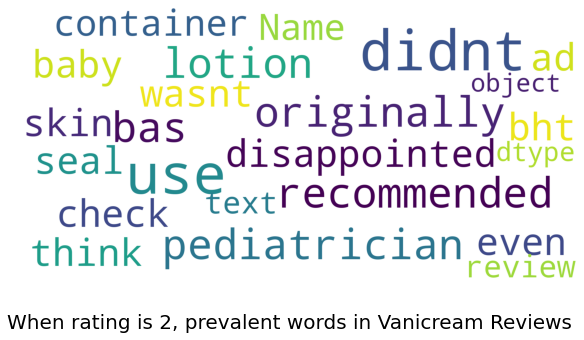

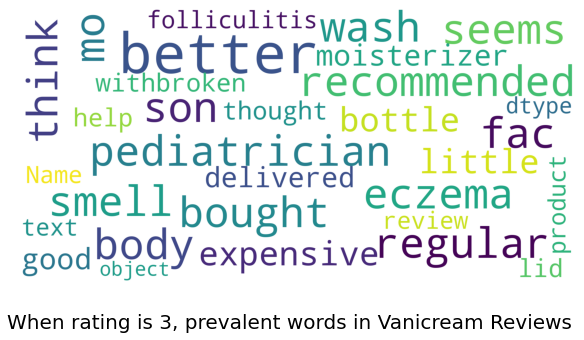

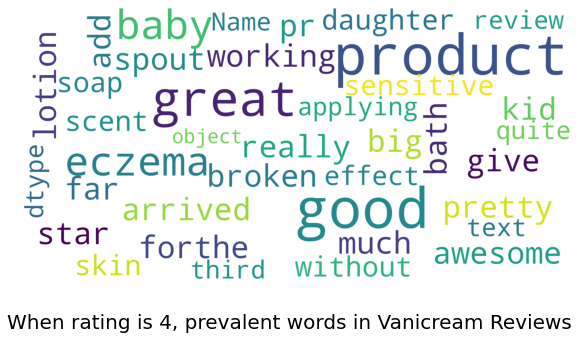

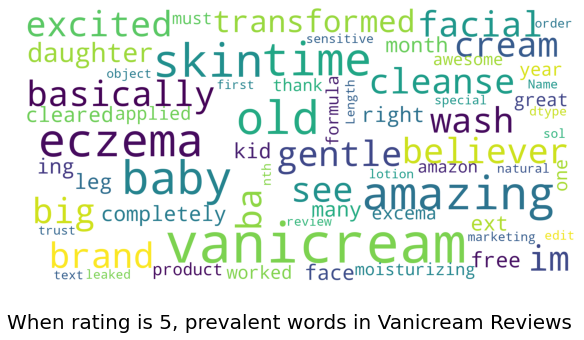

In [47]:
# Explore more prevalent words within different rating 
for i in range(1,6):
    show_wordcloud(df_Vanicream[df_Vanicream['review rating']== i]['review text'], title = 'When rating is {}, prevalent words in Vanicream Reviews'.format(i))

# Most Common Words